Plot something from an eWatercycle1 forecast output file.

In [1]:
import warnings
# Warnings make for ugly notebooks, ignore them
warnings.filterwarnings('ignore')

In [2]:
import iris
import iris.plot as iplt
import matplotlib.pyplot as plt
import numpy
import dask

In [3]:
fn = 'data/2017-11-21/work01/output/netcdf/discharge_dailyTot_output.nc'

In [4]:
#dask.set_options(get=dask.threaded.get)


In [5]:
# Run dask in multiprocessing mode
#from dask.multiprocessing import get
#dask.set_options(get=get)

In [5]:
# Run dask in distributed mode
# from dask.distributed import Client
# client = Client()
# dask.set_options(get=client.get)
# client

# Contour plot timings

## default

CPU times: user 21.3 s, sys: 5.1 s, total: 26.4 s
Wall time: 24.2 s

## threaded

CPU times: user 21.7 s, sys: 4.79 s, total: 26.5 s
Wall time: 24.3 s

First couple of seconds Python process is ~140% then drops to 100%.

## multiprocessing

CPU times: user 21.8 s, sys: 8.24 s, total: 30.1 s
Wall time: 40.6 s

First couple of seconds 3 Python processes at ~50% then single process at 100%

## distributed single vm

CPU times: user 21.6 s, sys: 2.67 s, total: 24.3 s
Wall time: 33.3 s

Same cpu usage as multiprocessing

In [5]:
cube = iris.load_cube(fn)

In [6]:
cube

<iris 'Cube' of discharge / (m3.s-1) (time: 9; latitude: 2160; longitude: 4320)>

In [7]:
print(cube)

discharge / (m3.s-1)                (time: 9; latitude: 2160; longitude: 4320)
     Dimension coordinates:
          time                           x            -                -
          latitude                       -            x                -
          longitude                      -            -                x
     Attributes:
          description: test version (by Edwin H. Sutanudjaja)
          institution: Department of Physical Geography, Utrecht University
          invalid_standard_name: discharge
          title: PCR-GLOBWB output


In [8]:
%matplotlib inline

In [9]:
clim = cube.collapsed('time', iris.analysis.MEAN)

In [10]:
print(clim)

discharge / (m3.s-1)                (latitude: 2160; longitude: 4320)
     Dimension coordinates:
          latitude                           x                -
          longitude                          -                x
     Scalar coordinates:
          time: 2017-11-25 00:00:00, bound=(2017-11-21 00:00:00, 2017-11-29 00:00:00)
     Attributes:
          description: test version (by Edwin H. Sutanudjaja)
          institution: Department of Physical Geography, Utrecht University
          invalid_standard_name: discharge
          title: PCR-GLOBWB output
     Cell methods:
          mean: time


CPU times: user 23.7 s, sys: 5.2 s, total: 28.9 s
Wall time: 26.2 s


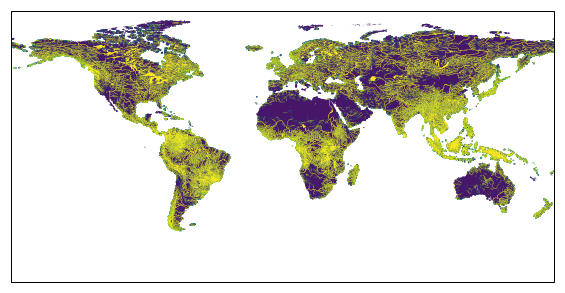

In [11]:
fig = plt.figure(figsize=[12,5])
%time iplt.contourf(clim, levels=numpy.arange(0, 10), extend='max')